In [1]:
import os
import cv2
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [18]:
SCALE = 4

In [32]:
MARK = False

for imagepath in glob.glob(os.path.join('..', 'tkinter', 'validation', '**', '*.jpg')):
    data = cv2.imread(imagepath)
    data = cv2.resize(data, (1280 // SCALE, 720 // SCALE))
    assert data.shape == (180, 320, 3)
    data = data[:, :, ::-1]
    
    clean_cnt = 0
    dirty_cnt = 0
    dirty_list = []

    max_rgb = np.max(data, 2)
    isBlue = (data[:, :, 2] == max_rgb)
    mean_rgb = np.expand_dims(np.mean(data, 2), 2)
    isGray = np.max(np.abs(data - mean_rgb), 2) < 20

    for x in range(data.shape[0]):
        for y in range(data.shape[1]):
            if isBlue[x][y]:
                if MARK:
                    data[x][y] = (0, 0, 255)
            else:
                if isGray[x][y]:
                    if MARK:
                        data[x][y] = (0, 255, 0)
                    clean_cnt += 1
                else:
                    dirty_cnt += 1
                    dirty_list.append(data[x][y])
#             if isGray[x][y]:
#                 if MARK:
#                     data[x][y] = (0, 177, 64)
#                 clean_cnt += 1
#             else:
#                 if isBlue[x][y]:
#                     if MARK:
#                         data[x][y] = (0, 0, 255)
#                 else:
#                     dirty_cnt += 1
#                     dirty_list.append(data[x][y])

    ratio = dirty_cnt / clean_cnt * 100.0
    
    print(clean_cnt, dirty_cnt, '%.1f' % (dirty_cnt / clean_cnt * 100), imagepath)

7501 58 0.8 ..\tkinter\validation\clean\img_0.jpg
7097 0 0.0 ..\tkinter\validation\clean\img_1.jpg
11272 1980 17.6 ..\tkinter\validation\clean\img_23.jpg
9100 68 0.7 ..\tkinter\validation\clean\img_3.jpg
6613 1837 27.8 ..\tkinter\validation\dirty\img_10.jpg
12412 3676 29.6 ..\tkinter\validation\dirty\img_12.jpg
2441 2524 103.4 ..\tkinter\validation\dirty\img_13.jpg
3104 2662 85.8 ..\tkinter\validation\dirty\img_14.jpg
2332 869 37.3 ..\tkinter\validation\dirty\img_15.jpg
3918 1470 37.5 ..\tkinter\validation\dirty\img_16.jpg
7898 2897 36.7 ..\tkinter\validation\dirty\img_18.jpg
8135 7343 90.3 ..\tkinter\validation\dirty\img_19.jpg
2345 4760 203.0 ..\tkinter\validation\dirty\img_2.jpg
7312 10237 140.0 ..\tkinter\validation\dirty\img_20.jpg
7653 2813 36.8 ..\tkinter\validation\dirty\img_21.jpg
7833 10740 137.1 ..\tkinter\validation\dirty\img_22.jpg
8627 2504 29.0 ..\tkinter\validation\dirty\img_24.jpg
3224 3816 118.4 ..\tkinter\validation\dirty\img_26.jpg
7174 1781 24.8 ..\tkinter\validati

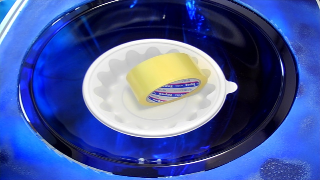

In [29]:
# data = cv2.imread(os.path.join('..', 'tkinter', 'validation', 'clean', 'img_17.jpg'))
data = cv2.imread(os.path.join('..', 'tkinter', 'validation', 'dirty', 'img_7.jpg'))
data = cv2.resize(data, (1280 // SCALE, 720 // SCALE))
data = data[:, :, ::-1]

Image.fromarray(data, 'RGB')

4540 2610 57.5


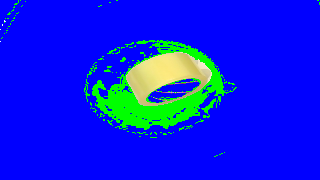

In [30]:
# data = cv2.imread(os.path.join('..', 'tkinter', 'validation', 'clean', 'img_17.jpg'))
data = cv2.imread(os.path.join('..', 'tkinter', 'validation', 'dirty', 'img_7.jpg'))
data = cv2.resize(data, (1280 // SCALE, 720 // SCALE))
data = data[:, :, ::-1]

clean_cnt = 0
dirty_cnt = 0
dirty_list = []

MARK = True

max_rgb = np.max(data, 2)
isBlue = (data[:, :, 2] == max_rgb)
mean_rgb = np.expand_dims(np.mean(data, 2), 2)
isGray = np.max(np.abs(data - mean_rgb), 2) < 20

for x in range(data.shape[0]):
    for y in range(data.shape[1]):
        if isBlue[x][y]:
            if MARK:
                data[x][y] = (0, 0, 255)
        else:
            if isGray[x][y]:
                if MARK:
                    data[x][y] = (0, 255, 0)
                clean_cnt += 1
            else:
                dirty_cnt += 1
                dirty_list.append(data[x][y])
#         if isGray[x][y]:
#             if MARK:
#                 data[x][y] = (0, 255, 0)
#             clean_cnt += 1
#         else:
#             if isBlue[x][y]:
#                 if MARK:
#                     data[x][y] = (0, 0, 255)
#             else:
#                 dirty_cnt += 1
#                 dirty_list.append(data[x][y])

ratio = dirty_cnt / clean_cnt * 100.0
print(clean_cnt, dirty_cnt, '%.1f' % ratio)


Image.fromarray(data, 'RGB')